In [3]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os

laser: 15%, 平均计数率：10 Mps

400ns内读数 ~ 1e7 / 1e9 * 400 = 4

## CW ODMR

In [12]:
with open('cw-on.json', 'r') as f:
    cw_on = json.load(f)
with open('cw-off.json', 'r') as f:
    cw_off = json.load(f)

cnt_cw_on = np.loadtxt('cw-on.txt')[1]
cnt_cw_off = np.loadtxt('cw-off.txt')[1]

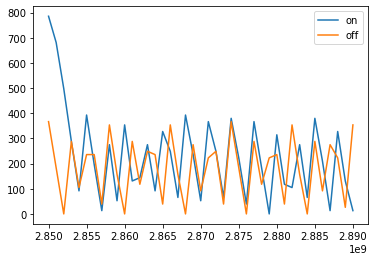

In [13]:
# counts 数据
freqs = cw_on['freqs']
plt.plot(freqs, cnt_cw_on,label='on')
plt.plot(freqs, cnt_cw_off,label='off')
plt.legend()

In [23]:
cnt_cw_off

array([366.8285, 183.3557,   0.    , 288.2388, 104.7729, 235.8613,
       235.8367,  39.2274, 353.7602, 157.1703,   0.    , 288.194 ,
       117.8868, 248.9623, 235.7696,  39.2229, 353.7953, 157.1615,
         0.    , 275.1687,  91.6642, 222.7481, 248.9171,  39.2496,
       366.8571, 183.395 ,   0.    , 288.2263, 117.8857, 222.6789,
       235.854 ,  39.2931, 353.7863, 157.1703,   0.    , 288.2414,
        91.6537, 275.1565, 222.6905,  26.1787, 353.7144])

In [24]:
cnt_cw_on

array([785.6663, 681.3972, 497.9453, 288.201 ,  91.6704, 393.058 ,
       196.4923,  13.0248, 275.1479,  52.332 , 353.8061, 130.9871,
       144.0564, 275.1773,  91.6848, 327.5537, 248.892 ,  65.4454,
       393.0277, 235.7821,  52.3539, 366.8481, 248.905 ,  65.4674,
       379.9666, 222.76  ,  39.2583, 366.8953, 183.3715,   0.    ,
       314.4071, 117.8416, 104.7764, 275.1376,  65.4639, 379.9366,
       209.5784,  13.0559, 327.541 , 130.9501,  13.0573])

每个 frequency 重复次数： 10000


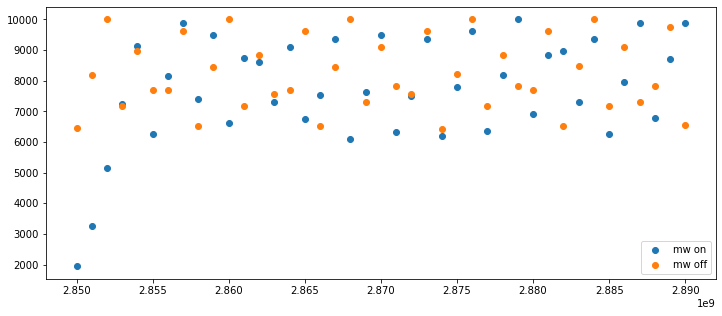

In [49]:
N = len(cw_on['origin_data'][0])
print('每个 frequency 重复次数：', N)
zero_counts_on = [N - np.count_nonzero(cw_on['origin_data'][i]) for i in range(len(freqs))]
zero_counts_off = [N - np.count_nonzero(cw_off['origin_data'][i]) for i in range(len(freqs))]
plt.figure(figsize=(12,5))
plt.scatter(freqs, zero_counts_on, label='mw on')
plt.scatter(freqs, zero_counts_off, label='mw off')
plt.legend()
plt.show()


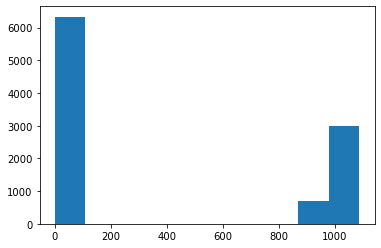

In [134]:
def mean_non_zero(x):
    b = np.count_nonzero(x)
    return np.sum(x) / b

plt.hist(cw_on['origin_data'][21])
plt.show()

10000 个数据中大约前 80% 都是 0

100 us 内 平均计数 1000，计数率 10 Mps

/var/folders/z5/dfqdcr193653pxpz83042_j80000gn/T/ipykernel_28573/1891414687.py:3: RuntimeWarning: invalid value encountered in long_scalars
  return np.sum(x) / b


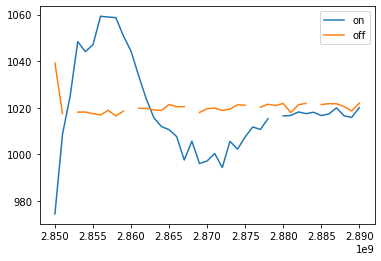

In [135]:
cnt_cw_on_new = [mean_non_zero(cw_on['origin_data'][i]) for i in range(len(freqs))]
cnt_cw_off_new = [mean_non_zero(cw_off['origin_data'][i]) for i in range(len(freqs))]
plt.plot(freqs, cnt_cw_on_new, label='on')
plt.plot(freqs, cnt_cw_off_new, label='off')
plt.legend()


In [131]:
100 

[974.5302654428182,
 1008.7301258327165,
 1025.0006175380815,
 1048.3848672244453,
 1044.0820045558087,
 1047.0378263185935,
 1059.2576819407009,
 1058.9268292682927,
 1058.6683339746057,
 1050.8433734939758,
 1044.2919126328218,
 1033.8366219415943,
 1023.8550106609808,
 1015.7892211148026,
 1011.9735099337748,
 1010.6562789262573,
 1007.65991902834,
 997.6432926829268,
 1005.7003582395087,
 996.1220954795099,
 997.2171428571429,
 1000.4038723752386,
 994.4266879744307,
 1005.6436251920123,
 1002.2859403851227,
 1007.5079149706015,
 1011.8118556701031,
 1010.7308539944903,
 1015.3460686600222,
 1,
 1016.5118008406079,
 1016.7523727351165,
 1018.2351797862002,
 1017.5207100591716,
 1018.1010886469674,
 1016.6887877976986,
 1017.3708737864077,
 1019.9921875,
 1016.5766604593421,
 1015.9045771916215,
 1020.1015625]

In [124]:
np.count_nonzero(cw_on['origin_data'][0])

8062

(array([    0.,     0.,     0.,     0.,     0., 10000.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

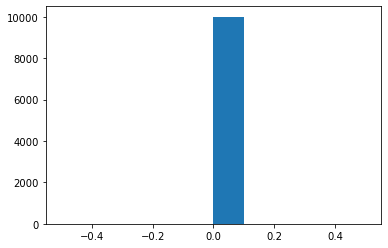

In [114]:
plt.hist(cw_on['origin_data'][])

## Pulse ODMR

In [37]:
contrast_pulse = np.loadtxt('pulse-result.txt')[1]
with open('pulse-result.json', 'r') as f:
    pulse = json.load(f)
freqs_pulse = pulse['freqs']

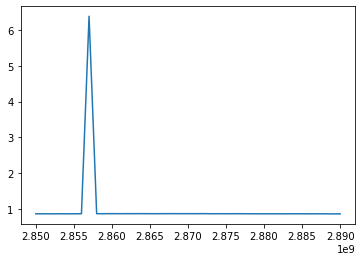

In [38]:
plt.plot(freqs_pulse, contrast_pulse)

In [77]:
orig_data = pulse['origin_data']
sig = orig_data[10][::2]
ref = orig_data[10][1::2]

In [139]:
def cal_contrast(ls):
    """
    :param ls: size of [N*2,]
    :return: size of scalar
    """
    # Sequence location problems
    ls = np.array(ls)
    # contrast = ls[::2] / ls[1::2]
    contrast =  np.abs(ls[::2].sum() - ls[1::2].sum()) / max(ls[1::2].sum(), ls[::2].sum())
    # contrast =  min(ls[::2].sum(), ls[1::2].sum()) / max(ls[1::2].sum(), ls[::2].sum())

    return contrast

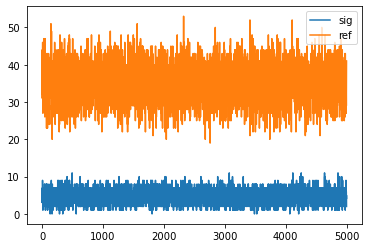

In [79]:
plt.plot(sig, label='sig')
plt.plot(ref, label='ref')
plt.legend()
plt.show()

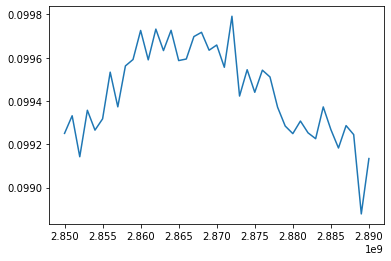

In [141]:
contrasts = [cal_contrast(orig_data[i]) / 8.7 for i in range(len(freqs_pulse))]
plt.plot([freqs_pulse[i] for i in range(len(freqs_pulse))], contrasts)

疑问猜测：双pulse读出的第二个数据不可信，例如明明计数率 10 Mps，第二个参考信号读数大约 87 Mps

In [104]:
len(orig_data[0])

10000

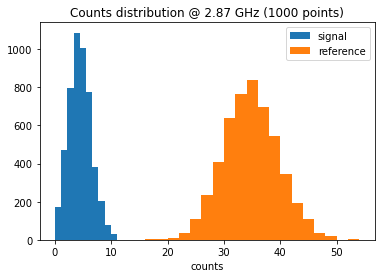

In [154]:
idx = freqs_pulse.index(2.87e9)
# idx = 0
plt.hist(orig_data[idx][::2], bins=10, label='signal')
plt.hist(orig_data[idx][1::2], bins=19, label='reference')
plt.legend()
plt.xlabel('counts')
plt.title('Counts distribution @ 2.87 GHz (1000 points)')
plt.show()


In [137]:
35/400*1e9/1e6

87.5

## Pulse ODMR (single pulse readout)

In [157]:
sim_pulse_on = np.loadtxt('pulse-on.txt')
sim_pulse_off = np.loadtxt('pulse-off.txt')
with open('pulse-on.json', 'r') as f:
    pulse_on = json.load(f)
with open('pulse-off.json', 'r') as f:
    pulse_off = json.load(f)

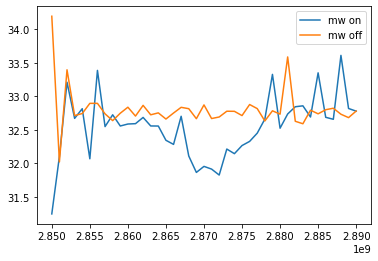

In [149]:
plt.plot(*sim_pulse_on, label = 'mw on')
plt.plot(*sim_pulse_off, label = 'mw off')
plt.legend()
plt.show()

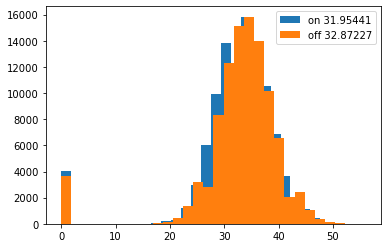

In [170]:
idx = 20
plt.hist(pulse_on['origin_data'][idx], label='on {}'.format(np.mean(pulse_on['origin_data'][idx])), bins=30)
plt.hist(pulse_off['origin_data'][idx], label='off {}'.format(np.mean(pulse_off['origin_data'][idx])), bins=30)
plt.legend()
plt.show()

In [171]:
sim_pulse_off[1]

array([34.19573, 32.02143, 33.39619, 32.713  , 32.74311, 32.89528,
       32.89544, 32.73859, 32.63746, 32.74809, 32.83772, 32.70558,
       32.86533, 32.72442, 32.75311, 32.66121, 32.75092, 32.83604,
       32.81558, 32.66636, 32.87227, 32.66864, 32.69173, 32.77776,
       32.77639, 32.71281, 32.87791, 32.81681, 32.63232, 32.78422,
       32.73398, 33.58801, 32.62779, 32.59073, 32.79317, 32.73899,
       32.80027, 32.82248, 32.73299, 32.68231, 32.78033])